Загрузка и преобразование данных:

In [3]:
import numpy as np
import keras
from keras.datasets import mnist, boston_housing, fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import matplotlib.pyplot as plt

(train_imagesi, train_labels),(test_imagesi, testn_labels) = fashion_mnist.load_data()

train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape)
print(test_images.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


Проверка данных:

In [4]:
n=1
train_imagesi[n,:,:].shape

(28, 28)

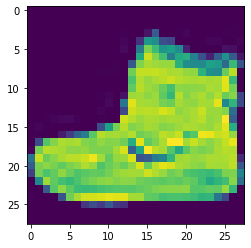

9


In [5]:
n=0
plt.imshow(train_imagesi[n,:,:])
plt.show()
print(train_labels[n])

In [6]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

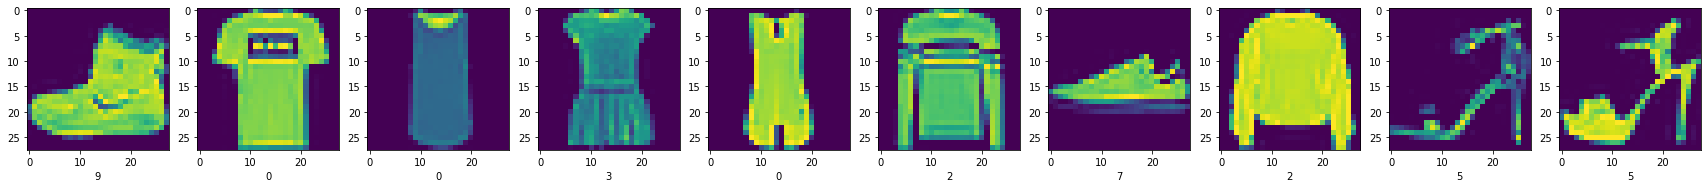

In [7]:
N=10
plt.figure(figsize = (3*N,5))
for i in range (N):
  plt.subplot(1,N,i+1)
  plt.imshow(train_imagesi[i,:])
  plt.xlabel(str(train_labels[i]))
plt.show()

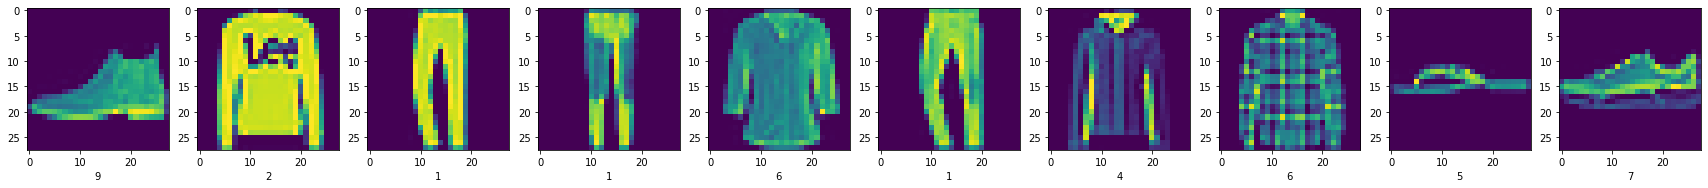

In [8]:
N=10
plt.figure(figsize = (3*N,5))
for i in range (N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_imagesi[i,:])
  plt.xlabel(str(testn_labels[i]))
plt.show()

Подберем лучший оптимайзер:

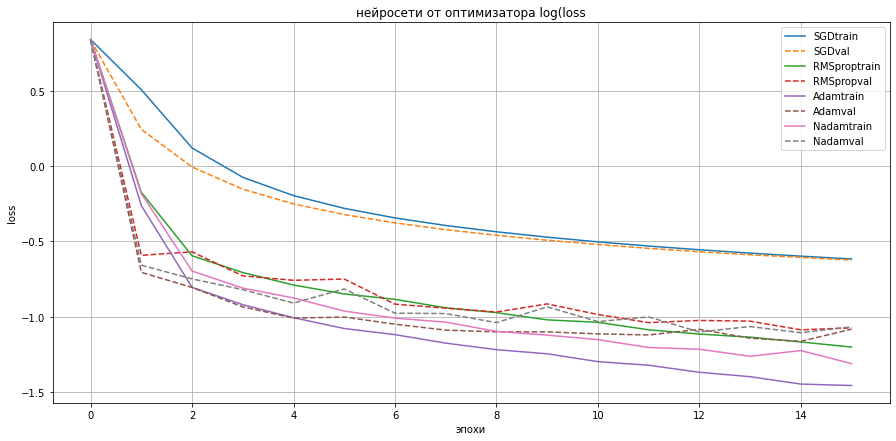

In [13]:
model = Sequential([
    Dense(128, activation='tanh', input_shape = (784,)),
    Dense(110, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(10, activation='softmax'),
])

model.save_weights('model.h5')

plt.figure(figsize = (15,7))

epochs = 15
epoch = np.arange(epochs+1)

for i_optim in ['SGD','RMSProp','adam','NAdam']:
  modeli = Sequential([
                      Dense(128, activation='tanh', input_shape = (784,)),
                      Dense(110, activation='tanh'),
                      Dense(100, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ]) 
  modeli.load_weights('model.h5')
  
  modeli.compile(
    optimizer = i_optim,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
  )

  hh0_tr = modeli.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]),verbose=0)
  hh0_val = modeli.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]),verbose=0)

  hh = modeli.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs = epochs,
                  batch_size = 1024, validation_split = 0.2, verbose=0
                  )
  
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']), '-', label = modeli.optimizer.get_config()['name']+ 'train' )
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']), '--', label = modeli.optimizer.get_config()['name']+ 'val' )

plt.legend()
plt.grid('On')
plt.title('нейросети от оптимизатора log(loss')
plt.xlabel('эпохи')
plt.ylabel('loss')
plt.show()

По графику видно, что лучший оптимайзер - Adam. Используем его.

In [101]:
model = Sequential([
    Dense(128, activation='tanh', input_shape = (784,)),
    Dense(110, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(10, activation='softmax'),
])

model.compile(
    optimizer = 'adam',
    loss = keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 128)               100480    
                                                                 
 dense_93 (Dense)            (None, 110)               14190     
                                                                 
 dense_94 (Dense)            (None, 100)               11100     
                                                                 
 dense_95 (Dense)            (None, 10)                1010      
                                                                 
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________


Создание и компиляция модели:

In [102]:
nmod = model.fit(
    train_images,
    to_categorical(train_labels),
    epochs = 25,
    batch_size = 2048, validation_split = 0.2, verbose = 1
)

model.evaluate(
    test_images,
    to_categorical(testn_labels)
)



Epoch 1/25
24/24 [==============================] - 2s 47ms/step - loss: 1.0152 - accuracy: 0.6599 - val_loss: 0.6151 - val_accuracy: 0.7772
Epoch 2/25
24/24 [==============================] - 1s 38ms/step - loss: 0.5468 - accuracy: 0.8056 - val_loss: 0.4941 - val_accuracy: 0.8237
Epoch 3/25
24/24 [==============================] - 1s 37ms/step - loss: 0.4580 - accuracy: 0.8376 - val_loss: 0.4404 - val_accuracy: 0.8409
Epoch 4/25
24/24 [==============================] - 1s 37ms/step - loss: 0.4155 - accuracy: 0.8521 - val_loss: 0.4158 - val_accuracy: 0.8522
Epoch 5/25
24/24 [==============================] - 1s 37ms/step - loss: 0.3906 - accuracy: 0.8611 - val_loss: 0.3942 - val_accuracy: 0.8592
Epoch 6/25
24/24 [==============================] - 1s 37ms/step - loss: 0.3660 - accuracy: 0.8702 - val_loss: 0.3817 - val_accuracy: 0.8638
Epoch 7/25
24/24 [==============================] - 1s 37ms/step - loss: 0.3501 - accuracy: 0.8752 - val_loss: 0.3823 - val_accuracy: 0.8610
Epoch 8/25
24

[0.36214667558670044, 0.8744000196456909]

<function matplotlib.pyplot.show(*args, **kw)>

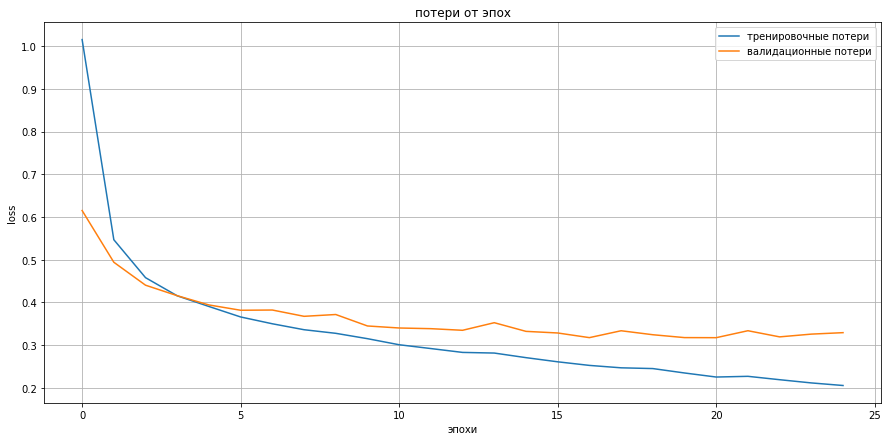

In [103]:
plt.figure(figsize = (15,7))
plt.plot(nmod.history['loss'], label = 'тренировочные потери')
plt.plot(nmod.history['val_loss'], label = 'валидационные потери')
plt.xlabel('эпохи')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('потери от эпох')
plt.show

Наименьшие потери получаются при умеренно большом количестве эпох и большом размере пакета, но если и дальше увеличивать количество эпох валидационные потери начинают возрастать. При большом количестве эпох и небольшом размере пакета результат получается средний с очень дерганным графиком валидационных потерь. Наихудший результат полуается при маленьком количестве эпох и небольшом размере пакета.

Эксперименты с увеличением количества нейронов в слоях при полученных выше наилучших параметрах эпох и размере пакета не дали улучшения результата. Он оказался немного хуже.

Дополнителное дообучение модели:

In [104]:
nmod = model.fit(
    train_images,
    to_categorical(train_labels),
    epochs = 10,
    batch_size = 1024, validation_split = 0.2, verbose = 0
)

<function matplotlib.pyplot.show(*args, **kw)>

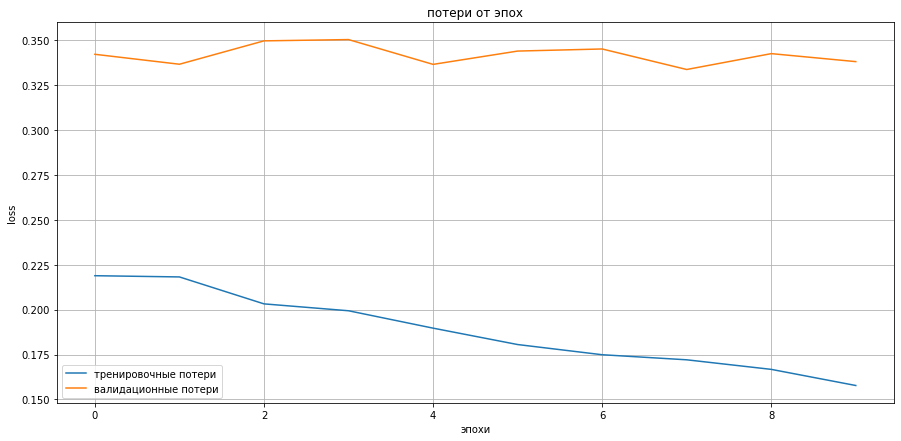

In [105]:
plt.figure(figsize = (15,7))
plt.plot(nmod.history['loss'], label = 'тренировочные потери')
plt.plot(nmod.history['val_loss'], label = 'валидационные потери')
plt.xlabel('эпохи')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('потери от эпох')
plt.show

При попытке дальнейшего дополнительного обучения уменьшаются только тренировочные потери, а валидационные остаются примерно на том же уровне. То есть, модель начинает переобучаться.

Предсказания и визуализация:

In [100]:
predictions = model.predict(test_images[10:20])
print(np.argmax(predictions, axis = 1))
print(testn_labels[10:20])

1/1 [==============================] - 0s 64ms/step
[4 5 5 3 4 1 2 2 8 0]
[4 5 7 3 4 1 2 4 8 0]


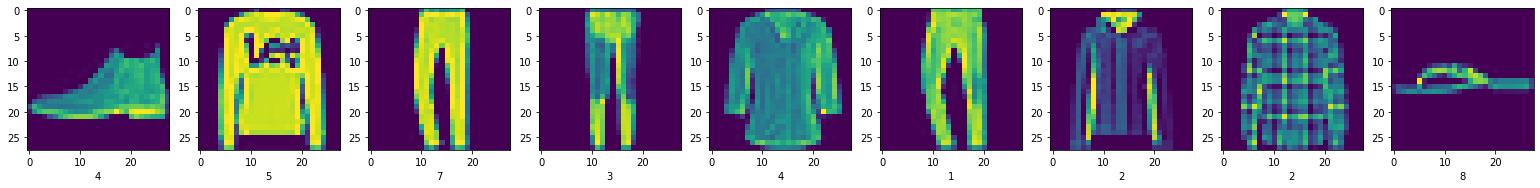

In [89]:
predictions_class = np.argmax(predictions, axis=1)
plt.figure(figsize = (3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(predictions_class[i]))
plt.show()

Модель ошиблать в третьем и восьмом предсказании. Вероятно она не смогла точно определить различия между джинсами и брюками и рубашкой и толстовкой.

Полезные команды Keras не разобранные на уроке:

Команда "early_stopping", прервающее обучение, если потери при проверке больше не уменьшаются:

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
model.fit(X, y, validation_split=0.2, callbacks=[early_stopping])